<a href="https://colab.research.google.com/github/darknight11345/turtlebot4/blob/main/Text_180125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
pwd

'/content'

In [5]:
!pip install simpletransformers

  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
!pip install fsspec==2024.10.0


  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [11]:
import pandas as pd
data = pd.read_csv("ner_dataset_with_head_towards_and_noise.csv",encoding="latin1", delimiter=";" )

In [12]:
print("Columns in the CSV:", data.columns)

Columns in the CSV: Index(['Sentence_ID', 'Word', 'Label'], dtype='object')


In [13]:
data.head(30)

,Sentence_ID,Word,Label
0,1,Navigate,ACTION
1,1,to,O
2,1,Room 282,LOCATION
3,1,with,O
4,1,Aspirin.,O
5,2,Take,ACTION
6,2,Ibuprofen,MEDICINE
7,2,to,O
8,2,Room 143.,LOCATION
9,3,Navigate,ACTION


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
data.rename(columns={"Sentence_ID":"sentence_id","Word":"words","Label":"labels"}, inplace =True)

In [16]:
data["labels"] = data["labels"].str.upper()

In [11]:
X= data[["sentence_id","words"]]
Y =data["labels"]

In [17]:
# Group words and labels by sentence_id
grouped_data = data.groupby("sentence_id")
sentences = grouped_data["words"].apply(list).tolist()  # List of sentences
labels = grouped_data["labels"].apply(list).tolist()    # List of label sequences


In [22]:
grouped_data.head()

,sentence_id,words,labels
0,1,Navigate,ACTION
1,1,to,O
2,1,Room 282,LOCATION
3,1,with,O
4,1,Aspirin.,O
...,...,...,...
9532,1999,Deliver,ACTION
9533,2000,Transport,ACTION
9534,2000,Paracetamol,MEDICINE
9535,2000,to,O


In [18]:
from sklearn.model_selection import train_test_split

# Split sentences and labels
sentences_train, sentences_test, labels_train, labels_test = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)


In [38]:
#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)
labels_train

[['ACTION', 'O', 'LOCATION', 'O', 'O', 'O'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['O', 'ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['O', 'LOCATION', 'MEDICINE', 'ACTION'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'O', 'O', 'O', 'LOCATION'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'O', 'O', 'O', 'LOCATION'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O', 'O', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'LOCATION'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O', 'O'],
 ['ACTION', 'O', 'LOCATION', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'LOCATION'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'O'],
 ['ACTION', 'MEDICINE', 'O', 'LOCATION'],
 ['ACTION', 'MEDICINE', 'O', 'O', 'LOCATION'],


In [39]:
# Function to reconstruct DataFrame
def reconstruct_dataframe(sentences, labels):
    data = []
    for i, (sentence, label) in enumerate(zip(sentences, labels)):
        for word, lbl in zip(sentence, label):
            data.append({"sentence_id": i, "words": word, "labels": lbl})
    return pd.DataFrame(data)

# Reconstruct train and test DataFrames
train_data = reconstruct_dataframe(sentences_train, labels_train)
test_data = reconstruct_dataframe(sentences_test, labels_test)

print(train_data.head())
train_data.shape

   sentence_id           words    labels
0            0              Go    ACTION
1            0              to         O
2            0  emergency room  LOCATION
3            0            with         O
4            0           Cough         O


(7630, 3)

<ipython-input-27-0ab53b535583>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


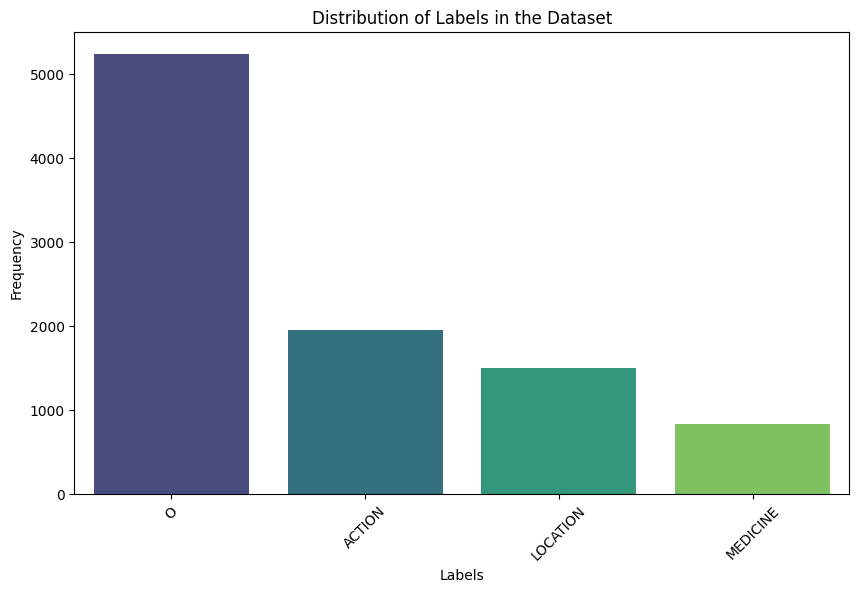

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in the form of a DataFrame named 'data'
# For example, 'data' has 'Label' column with different labels like 'ACTION', 'O', 'LOCATION'

# Count the frequency of each label
label_counts = data['labels'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [13]:
#building up train data and test data
#train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
#test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [35]:
#Model Training
train_data

,sentence_id,words,labels
0,0,Go,ACTION
1,0,to,O
2,0,emergency room,LOCATION
3,0,with,O
4,0,Cough,O
...,...,...,...
7625,1598,doctors_room.,O
7626,1599,Deliver,ACTION
7627,1599,Aspirin,MEDICINE
7628,1599,to,O


In [24]:

!pip install torch  --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [25]:


from simpletransformers.ner import NERModel,NERArgs

In [46]:
label = data["labels"].unique().tolist()
label

['ACTION', 'O', 'LOCATION', 'MEDICINE']

In [45]:
# Get the unique sentence ids
unique_sentences = test_data["sentence_id"].unique()

# Count the number of unique sentences
num_unique_sentences = len(unique_sentences)

# Print the count of unique sentences
print(f"The number of unique sentences is: {num_unique_sentences}")


The number of unique sentences is: 400


In [31]:
args = NERArgs()
args.num_train_epochs = 5
args.learning_rate = 1e-4
args.overwrite_output_dir = True
args.train_batch_size = 32
args.eval_batch_size = 32
args.gradient_accumulation_steps = 4
args.max_seq_length = 128
args.fp16 = True  # Enable mixed precision
#args.n_gpu = 2  # Set based on the number of GPUs
args.local_rank = -1
args.gradient_checkpointing = True  # Reduce memory usage
args.scheduler = "linear_schedule_with_warmup"
args.warmup_steps = 500  # Adjust based on your total steps
args.use_early_stopping = True
args.early_stopping_patience = 3
args.evaluate_during_training = True
args.evaluate_during_training_steps = 1000
args.dataloader_num_workers = 4  # Adjust based on your CPU resources


In [32]:
model = NERModel('bert', 'bert-base-uncased',labels=label,args =args, use_cuda=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Train the model
output_dir = "./best_model"
train_results, model_outputs, eval_results = model.train_model(train_data, eval_data=test_data, acc=accuracy_score, save_best_model=True, output_dir=output_dir)



# Print the raw eval_results to check its structure
print("Raw eval_results:", eval_results)

# Convert eval_results to a DataFrame for easier handling
eval_df = pd.DataFrame(eval_results)

# Print the DataFrame to inspect its structure
print("eval_df:", eval_df)

# Identify the epoch with the lowest validation loss (or the highest accuracy)
if 'eval_loss' in eval_df.columns:
    best_epoch_loss = eval_df['eval_loss'].idxmin()
    print(f"The best epoch based on eval_loss is: {best_epoch_loss} with eval_loss: {eval_df['eval_loss'][best_epoch_loss]}")
else:
    print("eval_loss column not found in eval_results")

# Identify the epoch with the highest validation accuracy (if available)
if 'eval_accuracy' in eval_df.columns:
    best_epoch_accuracy = eval_df['eval_accuracy'].idxmax()
    print(f"The best epoch based on eval_accuracy is: {best_epoch_accuracy} with eval_accuracy: {eval_df['eval_accuracy'][best_epoch_accuracy]}")
else:
    print("eval_accuracy column not found in eval_results")


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/50 [00:01<?, ?it/s]

In [ ]:
from google.colab import files
import shutil

# Create a zip file of the saved model
shutil.make_archive('/content/best_model', 'zip', '/content/best_model')

# Download the zip file
files.download('/content/best_model.zip')

In [23]:
import torch

# Save the model's state_dict (weights only)
torch.save(model.model.state_dict(), "model_weights.pth")

In [24]:
result, model_outputs, preds_list = model.eval_model(test_data)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/41 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOCATION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: MEDICINE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ACTION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [25]:
result

{'eval_loss': 0.4864750762538212,
 'precision': 0.6097308488612836,
 'recall': 0.6746849942726232,
 'f1_score': 0.6405655247417075}

In [30]:
prediction, model_output = model.predict(["deliver tablets to room 102"])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
prediction

[[{'deliver': 'O'},
  {'tablets': 'O'},
  {'to': 'O'},
  {'102': 'O'},
  {'room': 'O'}]]

In [34]:
import torch

training_args = torch.load("./outputs/training_args.bin")

# Print or inspect the contents
print(training_args)


NERArgs(adafactor_beta1=None, adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_eps=(1e-30, 0.001), adafactor_relative_step=True, adafactor_scale_parameter=True, adafactor_warmup_init=True, adam_betas=(0.9, 0.999), adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=32, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=False, gradient_accumulation_steps=4, learning_rate=0.0001, local_rank=-1, logging_steps=50, loss_type=None, loss_args={}, manual_seed=None, ma

<ipython-input-34-91d6a9a137b6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args = torch.load("./outputs/training_args.bin")
